# Pràctica 3: Regressió Logistica



## Gerard Santacatalina Rubio - 1534002


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta práctica será molt més dirigida que l'anterior. S'evaluarán els següents conceptes sobre una mateixa base de dades, que tractarà sobre els vins:

* A. Ús LogisticRegression (20%)
* B. Regularitzadors (40%)
* C. Demostració Error de Variance (20%)
* D. Demostració Error de Bias (20%)

A continuació veurem un exemple de regressió lineal, i com es comporta el regressor logistic.

<ipython-input-16-e97ea77312ac>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (X > d).astype(np.float)


(-2.5529898158340787, 2.2697546239876076)

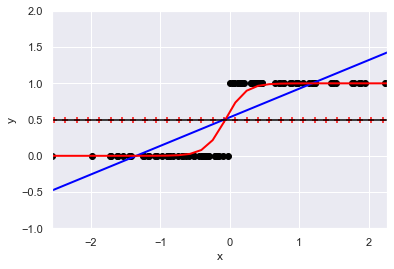

In [16]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
 

def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
d = 0
X = np.random.normal(size = 100) + d
xmin, xmax = X.min(), X.max()

y = (X > d).astype(np.float) 
X = X[:, np.newaxis] 
X_test = np.linspace(-4, 4, 50)

# Linear Regression:
rgr = linear_model.SGDRegressor(loss='squared_loss', learning_rate='constant', eta0=0.01)
rgr.fit(X, y)
plt.plot(X_test, rgr.coef_.ravel() * X_test + rgr.intercept_, color = 'blue', linewidth = 2)

# Logistic Regression:
clf = linear_model.SGDClassifier(loss='log', learning_rate='constant', eta0=0.05, max_iter=1000000)
clf.fit(X, y)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)


plt.axhline(0.5, color = 'black')
plt.scatter(X, y, color = 'black')
plt.scatter(X_test, X_test*0+0.5, color = 'red', marker='+')

plt.ylabel('y')
plt.xlabel('x')

plt.ylim(-1, 2)
plt.xlim(xmin, xmax)


Per cert, recordeu el què significa el error de Variança i el de bias.

<img src="bias_variance.png" width=600 height=600 />

In [17]:
# Codi esquelet per la pràctica de la 3 sessió: Regressió Logistica

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('winequalityN.csv')
dataset = dataset.dropna()
dataset['is_red_wine'] = (dataset["type"] == 'red').astype(int)


print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (6463, 14)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [18]:
dataset

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red_wine
0,white,7.000,0.270,0.360,20.700,0.045,45.000,170.000,1.001,3.000,0.450,8.800,6,0
1,white,6.300,0.300,0.340,1.600,0.049,14.000,132.000,0.994,3.300,0.490,9.500,6,0
2,white,8.100,0.280,0.400,6.900,0.050,30.000,97.000,0.995,3.260,0.440,10.100,6,0
3,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
4,white,7.200,0.230,0.320,8.500,0.058,47.000,186.000,0.996,3.190,0.400,9.900,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.800,0.620,0.080,1.900,0.068,28.000,38.000,0.997,3.420,0.820,9.500,6,1
6492,red,6.200,0.600,0.080,2.000,0.090,32.000,44.000,0.995,3.450,0.580,10.500,5,1
6494,red,6.300,0.510,0.130,2.300,0.076,29.000,40.000,0.996,3.420,0.750,11.000,6,1
6495,red,5.900,0.645,0.120,2.000,0.075,32.000,44.000,0.995,3.570,0.710,10.200,5,1


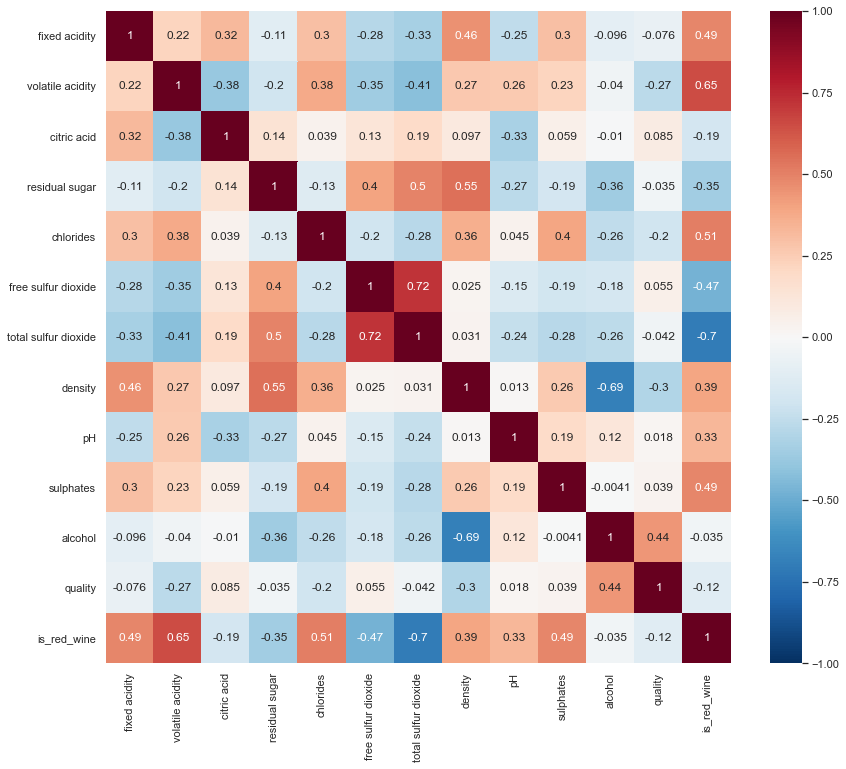

In [19]:
correlation = dataset.corr()
#display(correlation)
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

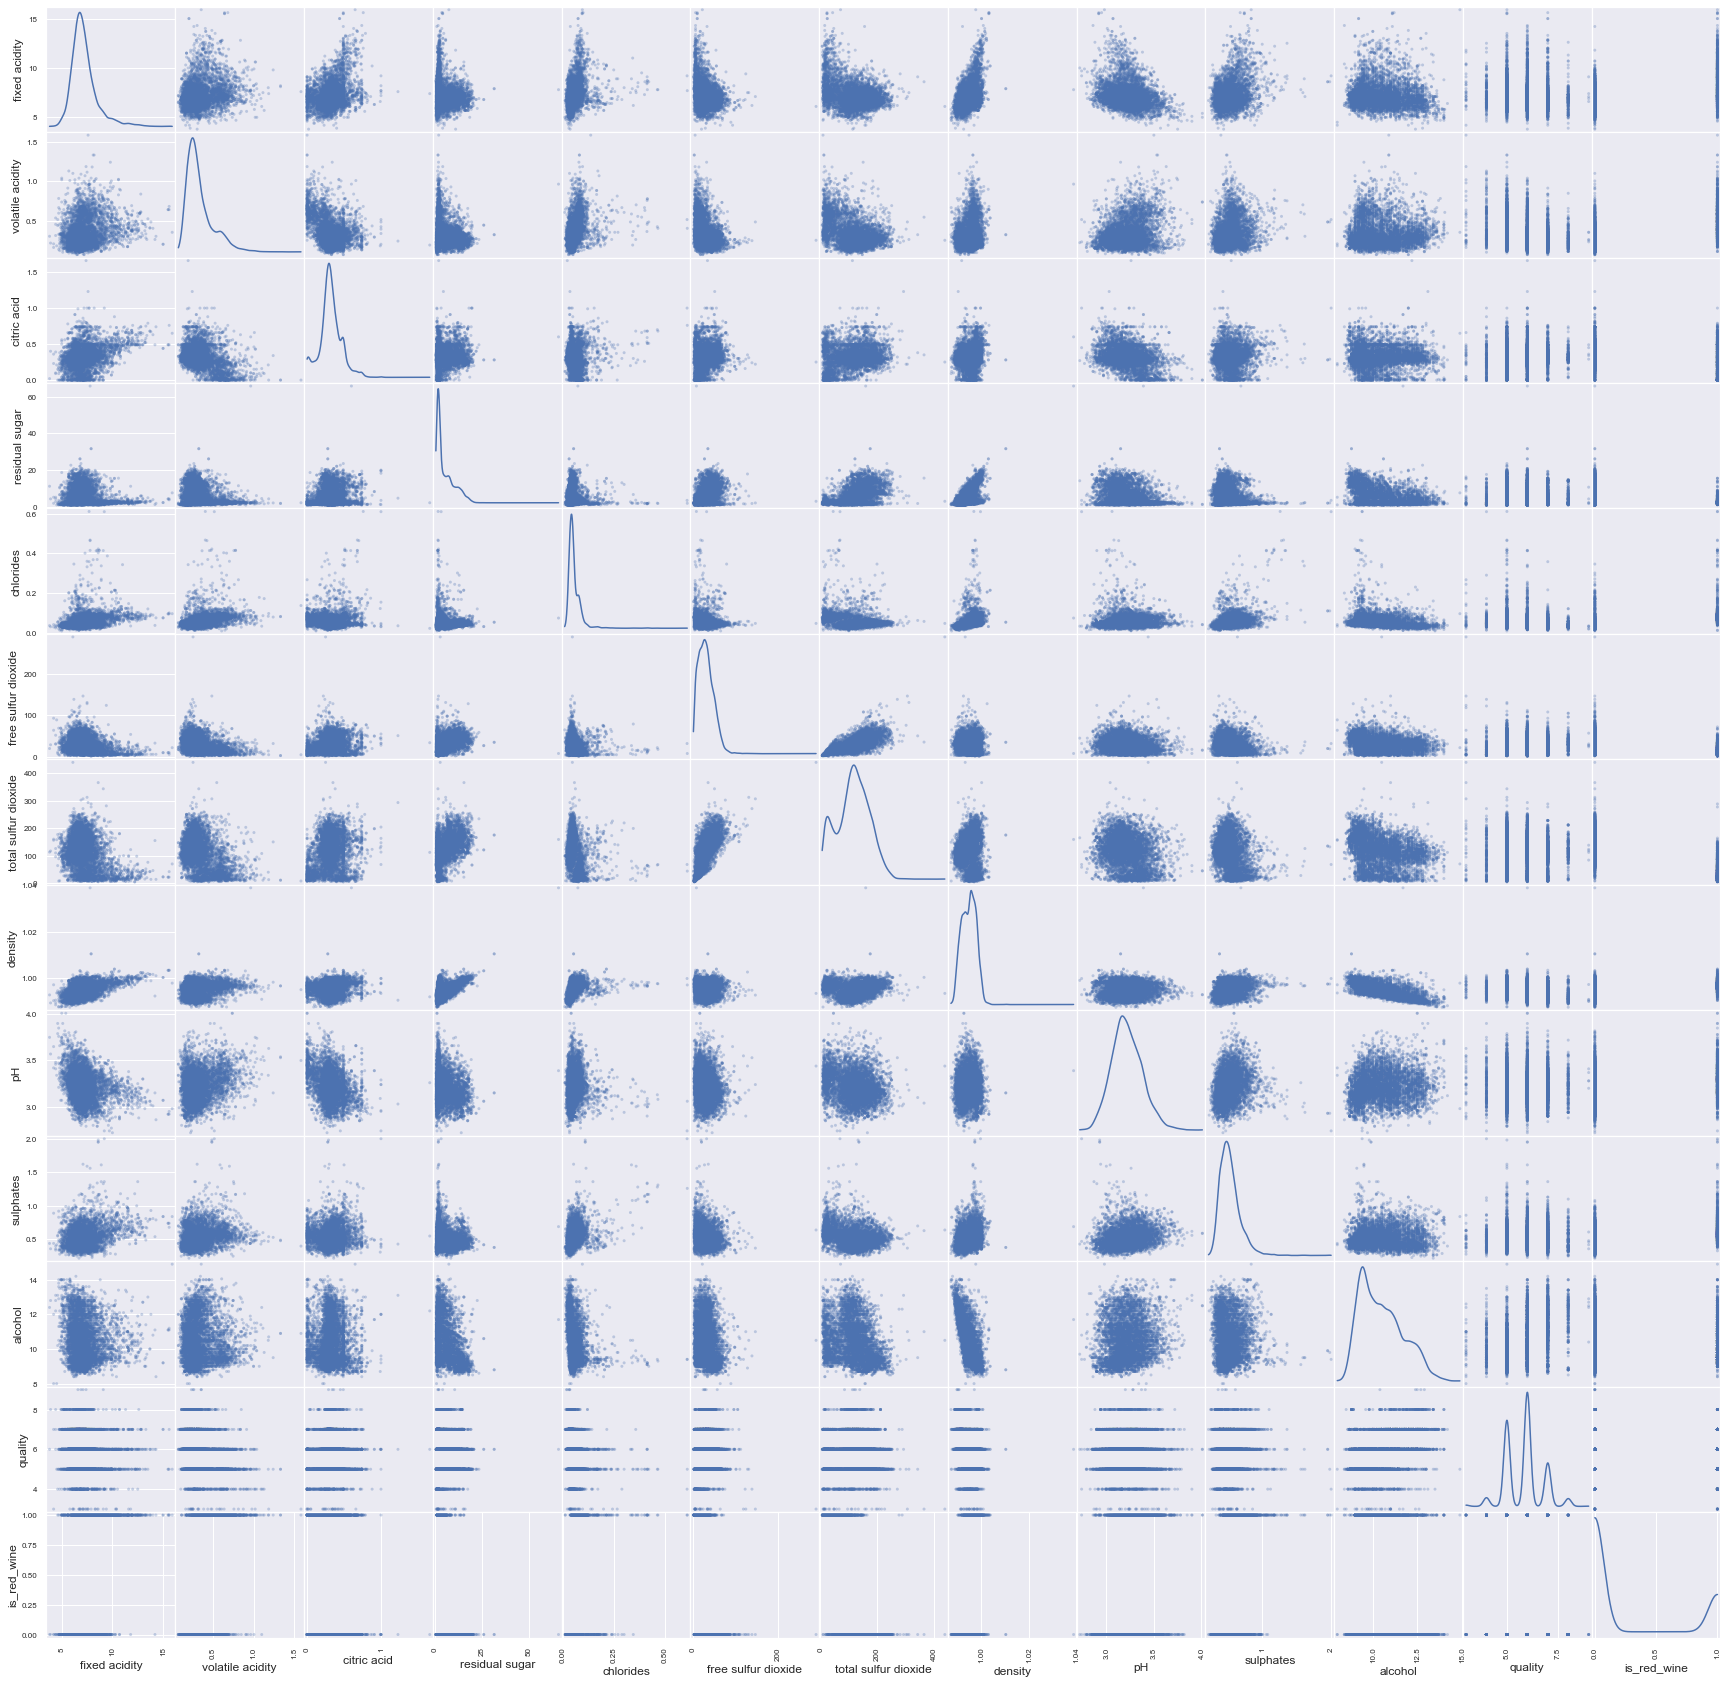

In [20]:
pd.plotting.scatter_matrix(dataset, alpha = 0.3, figsize = (30,30), diagonal = 'kde');

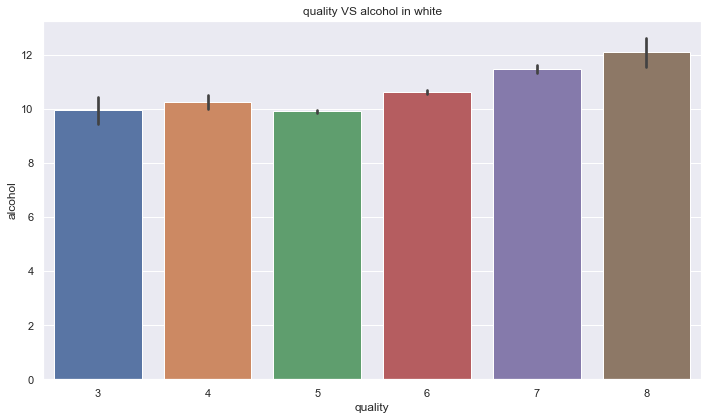

<Figure size 432x288 with 0 Axes>

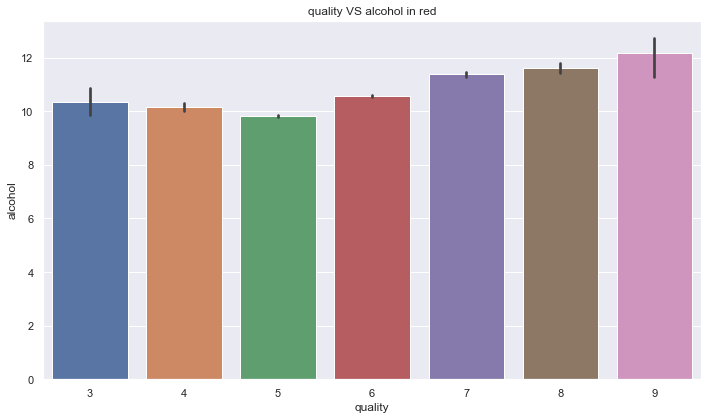

<Figure size 432x288 with 0 Axes>

In [21]:
#We can visualize relationships of discreet values better with a bar plot



fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="red"], ax=axs)
plt.title('quality VS alcohol in white')

plt.tight_layout()
plt.show()
plt.gcf().clear()

fig, axs = plt.subplots(ncols=1,figsize=(10,6))
sns.barplot(x='quality', y='alcohol', data=dataset[dataset.type=="white"], ax=axs)
plt.title('quality VS alcohol in red')

plt.tight_layout()
plt.show()
plt.gcf().clear()


Abans de començar amb els exercicis, preparem les dades per a que sigui una classificació binaria

In [22]:
#Defining the splits for categories. 1-5 will be poor quality, 6-10 will be great
bins = [1,5,10]

#0 for low quality, 1 for great quality
quality_labels=[0,1]
dataset['quality_categorical'] = pd.cut(dataset['quality'], bins=bins, labels=quality_labels, include_lowest=True)
# Split the data into features and target label
quality_raw = dataset['quality_categorical']
features_raw = dataset.drop(['type', 'quality', 'quality_categorical'], axis = 1)


In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples. {:.1f}% is positive".format(X_train.shape[0], 100*sum(y_train)/y_train.shape[0]))
print("Testing set has {} samples. {:.1f}% is positive".format(X_test.shape[0], 100*sum(y_test)/y_test.shape[0]))

display(X_test)

Training set has 5170 samples. 63.1% is positive
Testing set has 1293 samples. 64.3% is positive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,is_red_wine
3859,7.300,0.250,0.260,7.200,0.048,52.000,207.000,0.996,3.120,0.370,9.200,0
4675,5.700,0.210,0.370,4.500,0.040,58.000,140.000,0.993,3.290,0.620,10.600,0
513,7.400,0.360,0.330,1.400,0.025,27.000,55.000,0.992,3.210,0.330,11.200,0
5490,9.000,0.450,0.490,2.600,0.084,21.000,75.000,0.999,3.350,0.570,9.700,1
4329,6.400,0.230,0.260,8.100,0.054,47.000,181.000,0.995,3.120,0.490,9.400,0
...,...,...,...,...,...,...,...,...,...,...,...,...
410,7.200,0.250,0.390,18.950,0.038,42.000,155.000,1.000,2.970,0.470,9.000,0
4562,5.600,0.180,0.300,10.200,0.028,28.000,131.000,0.995,3.490,0.420,10.800,0
5626,6.400,0.570,0.020,1.800,0.067,4.000,11.000,0.997,3.460,0.680,9.500,1
1248,7.200,0.180,0.310,1.100,0.045,20.000,73.000,0.993,3.320,0.400,10.800,0


## A. Ús LogisticRegression (20%)

En aquesta secció us demanem que apliqueu de sklearn el model de  regressió logística amb Descens del Gradient ([SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)):

Si feu proves amb diferents parametres, guardeu els resultats que obtingueu en una taula de pandas i els mostreu.

* Guarda resultats de temps, de precisió, de accuracy, tant de train com de test

cal veure l'efecte de 
* canviar el *learning rate*,
* el tamany del conjunt d'entrenament
* normalitzar les dades


### Resposta:
Aquí el que he fet és executar el classificador pels 4 tipus de learning rate, pels 3 valors del training sample que hem considerat com és del 1, 10, 40 i 100% i pels dos casos en els que les dades estiguessin normalitzades i sense normalitzar, és a dir, 32 tests diferents. El algorisme de normalització que he fet servir és el min_max, també podria provar amb el mean_norm per veure l'impacte però crec que amb la taula de resultats que he fet ja hi han més que suficient mostres per veure l'impacte d'aquests diferents paràmetres. Quan el learning rate és "optimal" el alpha no pot ser 0, ha de ser més gran, sino donarà error el algorisme, per això he modificat el codi ficant que quan sigui "optimal" canvii el alpha a 0.1.

En primer lloc veiem que el learning rate que més accuracy i f1_score ens dona és el adaptive, tot i que és el que més temps triga de mitjana en executar-se pel que podem veure amb els temps que ens ha donat a la taula de resultats. El segon seria el learning_rate de tipus constant que és també el que menys temps triga respecte als altres tipus. Els que pitjor resultats ens donen tant pel que fa al accuracy com pel f1_score semblen ser el "optimal" i el "invscaling". Potser amb una altra configuració de paràmetres ens donarien millor resultats...


Pel que fa a la mida del conjunt de training, a mida que fem que aquest augmenti el que passa és que tenim un accuracy i un f1_score cada cop més alt perquè el nostre model haurà entrenat amb més dades i aleshores en principi serà més precís. Així i tot és clar que normalment tenim un punt de tall a partir del qual realment la precissió no augmenta gaire. De fet amb un sample size de 0.4 (40%) només tenim un 3.5% de penalització respecte al accuracy i al f1_score que obtenim amb un sample del 100%.

Finalment pel que fa a la normalització de les dades com podem veure ens augmenta tant el accuracy com el f1_score a la gran majoria dels tests excepte quan fem servir el learning rate "optimal" que sembla no ser així sempre. Ja vam veure a la darrera entrega de regressió com la normalització sempre ens baixava el mse, sobretot al normalitzar amb min_max. 
Aquí sembla que també tenim un guany gairebé sempre amb aquestes dues mètriques que hem analitzat. 


In [24]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score 
import timeit 

def entrena_prediu_evalua(model, X_train, y_train, X_test, y_test, sample_size=1): 
    '''
    inputs:
       - model: el objecte que s'entrenarà
       - sample_size: el número de mostres del training set que es farán servir (en %)
       - X_train: caracteristiques entrenament
       - y_train: etiqueta entrenament
       - X_test: caracteristiques test
       - y_test: etiqueta test
    '''


    """
    Entrenar el model tenint en compte el 'sample_size'  [:len(y_train)*sample_size]
    """
    
    start_time = timeit.default_timer()
    
    model.fit(X_train[:int(len(X_train)*sample_size)], y_train[:int(len(y_train)*sample_size)])

    """
    Obtenir les prediccions del model sobre el conjunt d'entrenament i sobre el conjunt de test
    """
    
    prediccions_train = model.predict(X_train)
    prediccions_test = model.predict(X_test)
    
    """
    Calcular el accuracy i el F1-score del train i del test
    """
    
    accuracy_train = accuracy_score(y_train, prediccions_train)
    accuracy_test = accuracy_score(y_test, prediccions_test)
    
    f1_score_train = f1_score(y_train, prediccions_train)
    f1_score_test = f1_score(y_test, prediccions_test)

    elapsed = timeit.default_timer() - start_time

    #print("\n{} s'ha entrenat amb el {}% de mostres.".format(model.__class__.__name__, sample_size*100))
    
    
    return elapsed, accuracy_train, accuracy_test, f1_score_train, f1_score_test 


In [25]:
from sklearn.linear_model import SGDClassifier

diccionari_res = {}
diccionari_res["learning_rate"] = []
diccionari_res["mida_train en %"] = []
diccionari_res["normalitzat"] = []
diccionari_res["temps"] = []
diccionari_res["accuracy_train"] = []
diccionari_res["accuracy_test"] = []
diccionari_res["f1_score_train"] = []
diccionari_res["f1_score_test"] = []

def classificador(dic, learn_r, normalitza, samples, X_train, y_train, X_test, y_test):
    assert samples in [1, 0.4, 0.1, 0.01], "Revisa els samples que tractarem en aquest analisi."
    nou_alpha = 0
    if learn_r=="optimal":
        nou_alpha=0.1
    clf = SGDClassifier(loss='log', penalty='l2',alpha=nou_alpha, learning_rate=learn_r,eta0=0.01,max_iter=1000000)
    temps, ac_train, ac_test, f1_train, f1_test = entrena_prediu_evalua(clf, X_train, y_train, X_test, y_test, samples)
    dic["learning_rate"].append(learn_r)
    dic["mida_train en %"].append(int(samples*100))
    dic["normalitzat"].append(normalitza)
    dic["temps"].append(temps)
    dic["accuracy_train"].append(ac_train)
    dic["accuracy_test"].append(ac_test)
    dic["f1_score_train"].append(f1_train)
    dic["f1_score_test"].append(f1_test)
    
    return dic

def normalitza_dades(dataset):
    nou_dataset = dataset.copy()
    for i in dataset.columns:
        if dataset[i].dtype in ["float64", "int64"]:
            maxim = dataset[i].max()
            minim = dataset[i].min()
            nou_dataset[i] = (dataset[i] - minim)/(maxim - minim)
    
    return nou_dataset 
        

learning_rates = ["constant", "optimal", "invscaling", "adaptive"]
train_samples = [1, 0.4, 0.1, 0.01]
normalitza_data = [False, True]

dataset_normalitzat = normalitza_dades(features_raw)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(dataset_normalitzat, 
                                                    quality_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

for i in learning_rates:
    for j in train_samples:
        for z in normalitza_data:
            if z==True:
                diccionari_res = classificador(diccionari_res, i, z, j, X_train_n, y_train_n, X_test_n, y_test_n)
            else:
                diccionari_res = classificador(diccionari_res, i, z, j, X_train, y_train, X_test, y_test)


taula_resultats = pd.DataFrame.from_dict(diccionari_res)
print(taula_resultats.to_string())
#No faig servir un display(taula_resultats) perquè no ens surten totes les observacions, només un petit subconjunt...

   learning_rate  mida_train en %  normalitzat  temps  accuracy_train  accuracy_test  f1_score_train  f1_score_test
0       constant              100        False  0.010           0.675          0.660           0.743          0.736
1       constant              100         True  0.013           0.733          0.739           0.803          0.809
2       constant               40        False  0.006           0.394          0.389           0.129          0.149
3       constant               40         True  0.009           0.716          0.724           0.779          0.787
4       constant               10        False  0.005           0.631          0.644           0.773          0.783
5       constant               10         True  0.007           0.709          0.719           0.778          0.788
6       constant                1        False  0.005           0.631          0.643           0.773          0.782
7       constant                1         True  0.005           0.631   

## B. Regularitzadors (40%)

* Descriu el parametre **penalty** de LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

* Què representen els atributs *coef_* i *intercept_*. Mostra'ls. Hi veus alguna diferencia depenen del regularitzador utilitzat?

* Què fa el parametre *alpha*. En quins casos afecta? Fes una taula mostrant els resultats.



### Resposta 
He programat la funció regressor_logistic de forma que quan el regularitzador sigui "elasticnet" es canvii el paràmetre l1_ratio a 0.5 que és el penalty que normalment té aquest regularitzador i aplica tant ridge com lasso, l2 i l1 plegats. Quan el regularitzador no sigui un elasticnet el l1_ratio no es toca mai, es deixa per default a "none". El paràmetre "solver" l'hem de especificar perque aquest concretament és el que suporta les regressions logístiques pel conjunt de regularitzadors que hem de provar en aquest exercici, és l'únic que els implementa tots pel que he pogut veure a la documentació. Després també he de dir que quan no treballem amb un elasticnet, em donava problemes amb la convergència, suposo que per algun altre regularitzador no arriba a convergir i he hagut de pujar el nombre d'iteracions a 140 perque convergeixi. Per default el nombre d'iteracions està fixat a 100 pel cas del regressor logístic. 
En aquest exercici faig servir les dades ja normalitzades perquè el problema estigui millor condicionat i fins i tot pugui fer que s'arribi a la convergència més ràpid. 

#### Pregunta 1: Descripció del paràmetre penalty del LogisticRegression {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}

El penalty no és altra cosa que canvis en el mètode d'aprenentatge com pot ser la funció de loss per millorar el rendiment diguessim. Necessitem la regularització per introduir bias al nostre model i reduïr la variància. Això ho aconseguim modificant la loss function afegint un terme de penalització que ens reduix la estimació dels coeficients. 
Aleshores tenim diversos mètodes que veurem per poder fer això. Un d'ells és el mètode l1 que es basa en l'arrel de la suma dels valors absoluts dels coeficients que anomenem regressió de Lasso. Lasso es propens a escollir una variable aleatòria quan les variables predictores estàn correlacionades i ens pot semblar que una variable ja no té cap importància pel model quan encara té força a l'hora de fer prediccions.
Per una altra banda tenim la regressió de Ridge que denotem per "l2". Aquest regressor de Ridge es basa en l'arrel quadrada de la suma dels valors dels coeficients al quadrat. Aquest regularitzador el que fa és reduïr l'estimació dels coeficients cap al 0. Aquí el únic mètode per mantenir el procediment d'optimització mantenint la funció de loss minima en general és assignar-los als coeficients valors més petits i això tampoc ho volem si volem que el model seleccioni variables importants. 
Finalment tenim el elasticnet que potser és un dels mes interessants ja que agafa els advantatges tant de Ridge com de Lasso (l1 i l2 plegats) i els introdueix en un sol regularitzador que fa servir tots dos. Aquí es manté que lambda controli el pes que li donem a la penalització pero ara el alpha dona el pes a l1 o l2. Aquest alpha serà 0<=alpha<=1 i quan alpha sigui 1 estarem fent servir un L1 en tota regla mentre que si és 0 serà un L2. El elasticnet normalment fa servir com a alpha 0.5 i dona el mateix pes tant a Lasso com a Ridge. 
Quan el penalty és "none" no hi tenim cap penalització en el nostre model, ni Lasso, ni Ridge ni el barrejat de tots dos. Generalment fem servir regularitzadors per reduïr el overfitting. 


#### Pregunta 2: Què representen els atributs coef_ i intercept_ del LinearRegression? Veus alguna diferència del regularitzador utilitzat?

En la següent cel·la de codi mostrem l'execució del LinearRegression amb els diferents regularitzadors/penalty per veure els coeficients i interceptes que ens surten. 

Els coeficients que veiem al printar el atribut coef_ del nostre regressor són els coeficients de les tetes del nostre model, aquests coeficients quan més grans sigui el seu valor absolut més impacte tindràn sobre el nostre model i aleshores direm que aquests atributs als que multiplica aquesta teta són més rellevants pel nostre model. Quan més petits siguin (més propers a 0) doncs menys rellevants seràn. 
La interpretació d'aquests coeficients pot canviar una mica depenent del tipus d'atributs, però per exemple, un coeficient d'un atribut numèric continu al que anomenarem T1 ens indicaria el canvi, impacte o diferència sobre la nostra predicció per cada unitat de diferència del atribut al que està relacionat aquest teta1 en cas que tots els altres atributs romanguin constants. Significa per exemple que si l'atribut X1 puja una unitat i el atribut X2 no canvia (el seu valor es manté constant) aleshores Y s'incrementarà o disminuirà (depenent el coeficient) en T1 en promig. En poques paraules, els coeficients ens indiquen el canvi esperat que es produeix en Y per unitat de canvi en teta_j quan la resta de variables o tetes del regressor teta_i (j!=i) es mantenen constants. Una teta concreta que és la teta_0 s'anomena diferent: intercepte. Tot seguit en parlem més. 


El intercepte que també moltes vegades anomenem constant és bàsicament el valor mitja de Y (predicció) que pren quan totes les altres variables valen 0. En cas que mai les X valguin 0 aleshores el significat d'aquest intercepte o constant no tindrà un significat rellevant perquè no ens aportarà informació entre X i Y o variable resposta i només es farà servir com un ancla per fixar el regressor a algún lloc. Per fer prediccions aquest intercepte el necessitem i si per exemple també tenim al nostre model variables binaries doncs aquest intercepte agafa un paper més important encara.

Al provar els diferents regularitzadors m'he adonat que tant el l1 com el l2 i el elasticnet tenen uns valors molt propers i de fet tant coeficients com intercepte del elasticnet s'apropen al promig dels coeficients i intercepte tant de l1 i l2. El elasticnet sempre es troba al mig entre els valors que agafa l1 com l2.
Pel que fa als coeficients i intercepte del regularitzador "none" doncs la veritat és que no te res a veure als altres tres, els valors són tots bastant diferents i no hi veig cap mena de correlació. 

In [26]:
from sklearn.linear_model import LogisticRegression

def regressor_logistic(X_train, y_train, regularitzador):
    if regularitzador=="elasticnet":
        reg_logistica = LogisticRegression(penalty=regularitzador, solver="saga", l1_ratio=0.5)
    else:    
        reg_logistica = LogisticRegression(penalty=regularitzador, solver="saga", max_iter=140)
        
    reg_logistica.fit(X_train, y_train)
    
    return reg_logistica 

for i in ["none", "l2", "elasticnet", "l1"]:
    logis = regressor_logistic(X_train_n, y_train_n, i)
    print("Fent servir el regularitzador "+str(i)+":\n")
    print("Coeficients: "+str(logis.coef_))
    print("Intercepte: "+str(logis.intercept_))
    print("\n---------------------------\n")
    

Fent servir el regularitzador none:

Coeficients: [[ 1.60696611 -6.99571701 -1.0030916   8.08969795 -1.35191757  5.03248839
  -3.1661117  -7.07334943  0.9211646   3.79231496  5.55713488  0.49442338]]
Intercepte: [-0.635309]

---------------------------

Fent servir el regularitzador l2:

Coeficients: [[ 0.13354289 -5.91269068 -0.47213225  3.49430962 -1.30231172  3.12393346
  -2.2356245  -0.3462136   0.25962734  2.6931004   5.92493274  0.14403881]]
Intercepte: [-0.82787116]

---------------------------

Fent servir el regularitzador elasticnet:

Coeficients: [[ 0.         -6.36609025 -0.57915208  3.76738227 -1.25992223  3.59647734
  -2.48109023  0.          0.17626715  2.8684273   6.20412644  0.19511198]]
Intercepte: [-0.85356625]

---------------------------

Fent servir el regularitzador l1:

Coeficients: [[ 0.         -6.93288752 -0.77191471  4.31709751 -1.15874462  4.42639985
  -2.88846525  0.          0.13334159  3.12007697  6.48632387  0.25161031]]
Intercepte: [-0.87922577]

-----

#### Pregunta 3: Què fa el paràmetre alpha? En quins casos afecta? Fes una taula mostrant resultats. 

Implementació fent servir el descens estocastic del gradient (funció SGDClassifier que hem fet servir fins ara) però amb unes petites proves provant el LogisticRegression i el paràmetre l1_ratio que ens permet donar més pes a un regularitzador o a un altre. 

Provarem amb el paràmetre l1_ratio que li passem al regressor logístic quan treballem amb un penalty o regularitzador de tipus "elasticnet" per veure que quan més ens apropem als extrems (0 o 1) més ens apropem cap a un Ridge o Lasso fins arribar a un dels dos. Normalment al escriure formalment aquest regularitzador denotem per alfa al paràmetre que dona més pes o be al Lasso o al Ridge. Podem variar el pes que li donem a un o al altre, normalment el elasticnet fa servir com a valor 0,5 donant el mateix pes a tots dos, si és 1 estarem aplicant un Lasso exclusivament i si és 0 un Ridge. 
Aleshores aquest alpha només afecta quan fem la regressió amb un regularitzador de tipus elasticnet i serveix per donar-li més pes a un penalitzador que al altre o assignar un pes equivalent a tots dos, depenent del cas i del problema amb el que treballem doncs potser serà més convenient una aproximació que una altra. 

De fet si ens fixem amb la taula que tot seguit hem fet veurem que quan fem servir un elasticnet amb una alfa de 0 i 1 i fem servir exclusivament un l1 o l2 els resultats són els mateixos. Comparem la primera amb la darrera fila (elasticnet amb alpha=0 vs l2) i la antepenultima amb la penultima (elasticnet amb alpha=1 vs l1) i veiem que efectivament a cada cop que ens apropem o be a 1 o a 0 estarem més a prop d'un penalitzador o regularitzador de Lasso o de Ridge respectivament.

Si veiem els coeficients dels atributs i el intercepte clarament varia al aplicar cadascun dels regularitzadors, a cada cop que ens apropem més a un regularitzador de tipus Lasso podem veure com ens apropa o redueix el pes dels atributs cap al 0 com és el cas del teta1 i teta8 per exemple, mentre que a mesura que ens apropem cap a un Ridge (l2 o alpha=0)  veiem el cas contrari mentre que aquest dona una mica més de pes sobre els coeficients més petits. 

### Provant primer amb un LogisticRegression:

In [27]:
diccionari_resultats = {}
diccionari_resultats["penalty"] = []
diccionari_resultats["l1_ratio"] = []
diccionari_resultats["intercepte"] = []
for _,j in zip(X_train_n, [i for i in range(len(X_train_n.columns))]):
    diccionari_resultats["t"+str(j+1)] = []


    
for step in range(11):
    ratio = (step/10)
    reg_logistica_alpha = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=ratio)
    reg_logistica_alpha.fit(X_train_n, y_train_n)
    diccionari_resultats["penalty"].append("elasticnet")
    diccionari_resultats["l1_ratio"].append(ratio)
    diccionari_resultats["intercepte"].append(reg_logistica_alpha.intercept_[0])
    e=0
    for coef in reg_logistica_alpha.coef_:
        for i,j in zip(X_train_n, coef):
            teta = "t"+str(e+1)
            diccionari_resultats[teta].append(j)
            e+=1
            

for i in ["l1", "l2"]:
    reg_logistica_alpha = LogisticRegression(penalty=i, solver="saga")
    reg_logistica_alpha.fit(X_train_n, y_train_n)
    diccionari_resultats["penalty"].append(i)
    diccionari_resultats["l1_ratio"].append(None)
    diccionari_resultats["intercepte"].append(reg_logistica_alpha.intercept_[0])
    step=0
    for coef in reg_logistica_alpha.coef_:
        for i,j in zip(X_train_n, coef):
            teta = "t"+str(step+1)
            diccionari_resultats[teta].append(j)
            step+=1

taula_resultats_alpha = pd.DataFrame.from_dict(diccionari_resultats)
print(taula_resultats_alpha.to_string())

       penalty  l1_ratio  intercepte    t1     t2     t3    t4     t5    t6     t7     t8    t9   t10   t11   t12
0   elasticnet     0.000      -0.827 0.133 -5.912 -0.473 3.494 -1.302 3.124 -2.236 -0.346 0.260 2.692 5.925 0.144
1   elasticnet     0.100      -0.832 0.106 -5.995 -0.490 3.543 -1.296 3.202 -2.277 -0.281 0.244 2.724 5.977 0.154
2   elasticnet     0.200      -0.837 0.076 -6.082 -0.509 3.591 -1.289 3.287 -2.322 -0.205 0.227 2.757 6.032 0.164
3   elasticnet     0.300      -0.843 0.044 -6.173 -0.529 3.639 -1.281 3.380 -2.371 -0.116 0.208 2.792 6.090 0.174
4   elasticnet     0.400      -0.850 0.006 -6.269 -0.552 3.679 -1.273 3.482 -2.425 -0.004 0.186 2.827 6.154 0.183
5   elasticnet     0.500      -0.853 0.000 -6.366 -0.579 3.767 -1.259 3.597 -2.481 -0.000 0.177 2.868 6.204 0.194
6   elasticnet     0.600      -0.859 0.000 -6.468 -0.611 3.863 -1.244 3.724 -2.544  0.000 0.168 2.912 6.255 0.206
7   elasticnet     0.700      -0.864 0.000 -6.575 -0.646 3.965 -1.227 3.867 -2.614  0.00

### Tot seguit continuarem fent servir el SGDClassifier que haviem estat fent servir fins ara:

Tot seguit el que mostrem és una taula on tenim les diferents proves que he anat fent amb un penalty diferent passant com a paràmetre un alpha diferent per veure el impacte que te sobre els coeficients fent que aquests tendeixin cap al 0 a mesura que el alpha es fa més i més gran. Aquest alpha el que fa és aplicar un pes més gran de penalització sobre el regularitzador i aleshores els nostres coeficients cada cop són més petits a mesura que augmentem el alpha. Depèn del regularitzador que fem servir doncs ens penalitzarà tots a l'hora o prioritzarà els coeficients més petits per exemple. 

In [28]:
diccionari_resultats = {}
diccionari_resultats["penalty"] = []
diccionari_resultats["alpha"] = []
diccionari_resultats["intercepte"] = []
for _,j in zip(X_train_n, [i for i in range(len(X_train_n.columns))]):
    diccionari_resultats["t"+str(j+1)] = []


    
for step in [1e-7, 0.0001, 0.001, 0.01, 1]:
    reg_logistica_alpha = SGDClassifier(loss='log', penalty="elasticnet", alpha=step, eta0=0.01, max_iter=1000000)
    reg_logistica_alpha.fit(X_train_n, y_train_n)
    diccionari_resultats["penalty"].append("elasticnet")
    diccionari_resultats["alpha"].append(step)
    diccionari_resultats["intercepte"].append(reg_logistica_alpha.intercept_[0])
    e=0
    for coef in reg_logistica_alpha.coef_:
        for i,j in zip(X_train_n, coef):
            teta = "t"+str(e+1)
            diccionari_resultats[teta].append(j)
            e+=1
            

for i_pen in ["l1", "l2"]:
    for j in [1e-7, 0.0001, 0.001, 0.01, 1]: 
        reg_logistica_alpha = SGDClassifier(loss='log', penalty=i_pen,alpha=j, eta0=0.01, max_iter=1000000)
        reg_logistica_alpha.fit(X_train_n, y_train_n)
        diccionari_resultats["penalty"].append(i_pen)
        diccionari_resultats["alpha"].append(j)
        diccionari_resultats["intercepte"].append(reg_logistica_alpha.intercept_[0])
        step=0
        for coef in reg_logistica_alpha.coef_:
            for i,j in zip(X_train_n, coef):
                teta = "t"+str(step+1)
                diccionari_resultats[teta].append(j)
                step+=1

taula_resultats_alpha = pd.DataFrame.from_dict(diccionari_resultats)
print(taula_resultats_alpha.to_string())

       penalty  alpha  intercepte     t1      t2     t3     t4      t5     t6      t7      t8     t9    t10    t11    t12
0   elasticnet  0.000      -6.223  3.541 -36.359 -2.536 54.520 -18.288 28.888 -12.656 -34.285 13.239 17.202 38.607  9.744
1   elasticnet  0.000      -0.971  0.254  -6.536 -0.783  4.267  -1.442  4.012  -2.733  -0.751  0.205  3.068  6.262  0.336
2   elasticnet  0.001      -0.500  0.000  -3.921  0.067  1.541  -0.841  1.275  -1.153  -0.058  0.241  1.571  4.904 -0.121
3   elasticnet  0.010       0.175  0.000  -0.879  0.053  0.000  -0.147  0.000  -0.279  -0.181  0.000  0.180  2.033 -0.343
4   elasticnet  1.000       0.430  0.000   0.000  0.000  0.000   0.000  0.000   0.000   0.000  0.000  0.000  0.000  0.000
5           l1  0.000      -3.872 -9.111 -55.597  0.000 67.817 -14.339 36.844 -25.676 -25.930 11.088 55.622 43.303  5.363
6           l1  0.000      -0.878  0.200  -7.235 -0.870  4.873  -1.378  4.929  -3.192  -0.665  0.200  3.366  6.572  0.053
7           l1  0.001   

## C. Demostració Error de Bias (20%)

* Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)

* Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % de entrenament)

* I si utilitzem poques iteracions limitant el *max_iter*


#### Pregunta 1: Què hem de fer per veure que el model que estem provant té un error de bias molt alt? (es a dir, model simple)
En primer lloc hem de recordar que el bias és una mesura de com de prop està un model de captar la relació entre els inputs i els outputs, el que fa és definir la rigidesa del model, és a dir, si aquest és molt simple o no. Un problema amb un bias elevat ens pot ajudar quan el bias coincideix amb la funció de relació que tenim al darrere del que és el problema predictiu. Això sí, un model amb un bias elevat no ens servirà de res quan la forma funcional del problema no coincideix amb les assumpcions del model. Aquest bias ha de ser sempre positiu i quan tenim un valor de bias alt el que ens dirà això és que tenim underfitting. El bias i la variança (que veurem després) tècnicament no els podem calcular però si els podem estimar, i ens servirà com una eina conceptual sobre el nostre model. 
Una manera de veure si tenim un bias elevat podria ser per exemple modificant els paràmetres del size del train per fer que aquest model entreni amb una mida de train diferent, més gran o més petit i avaluant el performance o accuracy sobre test i train per cada configuració i veient com evoluciona el accuracy de tots dos a un gràfic. 
També podem calcular el MBE (Mean Bias Error) que he vist per la xarxa, aquesta mètrica ens mostra el bias promig del nostre model. Sabem que el MSE serà la suma del bias i la variància, aleshores calculant el MSE i el MBE podrem també saber la variància del nostre model que discutirem després. Implementem una funció per calcular el MBE.
He trobat també una llibreria que faré servir per validar els meus resultats i veure si coincideix o si s'apropa bastant. Aquesta llibreria calcula directament el MSE que és la suma dels valors del bias i la variància, valors que també ens retorna. 

In [29]:
import numpy as np


def calcula_MBE(y_true, y_pred):
    y_true_r = np.array(y_true).reshape(len(y_true), 1)
    y_pred_r = np.array(y_pred).reshape(len(y_pred), 1)
    mitjana_diferencia_absoluta = abs(y_true_r-y_pred_r).mean()
    
    return mitjana_diferencia_absoluta

def calcula_MSE(y_true, y_pred):
    y_true_r = np.array(y_true).reshape(len(y_true), 1)
    y_pred_r = np.array(y_pred).reshape(len(y_pred), 1)
    quadrats_diferencies = ((y_true_r-y_pred_r)**2).mean()
    
    return quadrats_diferencies 
    
def perform_bias(y_true, y_pred, test_size, max_iter, algorisme_error="dos"):
    x_train, x_test, y_train, y_test = train_test_split(y_true, y_pred, test_size = test_size, random_state=0)
    clf = SGDClassifier(loss="log", alpha=0.1, eta0=0.01, max_iter=max_iter)

    clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    
    if algorisme_error=="dos":
        return calcula_MBE(y_test, pred_test), calcula_MSE(y_test, pred_test)
    else:
        return calcula_MBE(y_test, pred_test)

mbe_train, mse_train = perform_bias(dataset_normalitzat, quality_raw, 0.2, 1000000, "dos")
print("El MBE pel nostre model és de: "+str(mbe_train)+"\nEl MSE pel nostre model és: "+str(mse_train))

El MBE pel nostre model és de: 0.35730858468677495
El MSE pel nostre model és: 0.35730858468677495


#### Pregunta 2: Què passa si fem servir poques dades per entrenar? (mostra com varien els resultats segons % d'entrenament).
Veiem que si entrenem amb molt poques dades com un 1% el error MBE ens surt a gairebé 0.37, al augmentar a 2,5% el train el MBE cau fins a un 0.327 més o menys però a mida que anem augmentent el percentatge de train fins al 25% aquest puja d'un 0.327 fins a un 0.365, la diferència no és gaire però és interessant veure el impacte que la mida del train té sobre aquest MBE. A partir d'un train amb mida 25% fins al 95% el MBE s'estabilitza, osigui té una tendència assimptòtica entorn al 0.362 i 0.367. Si fem servir poques dades per entrenar podem imaginar que el model clarament serà menys precís i estarà menys adaptat a una elevada variància. Hem de pensar en el fet que si l'error està definit per la variància de les prediccions, podrem millorar el model entrenant amb més dades (augmentant així el train size) perquè el model aprendrà a generalitzar millor diguéssim i la variància que veurem després baixarà però si volem tenir un bias més petit aleshores hauriem de fer servir un altre model. Si augmentem el train size això ens donarà un model amb una variància reduïda i al reduïr la variància ens porta a incrementar el bias aleshores si augmentem el train size el que farem serà reduïr la variància i pujar el bias. 

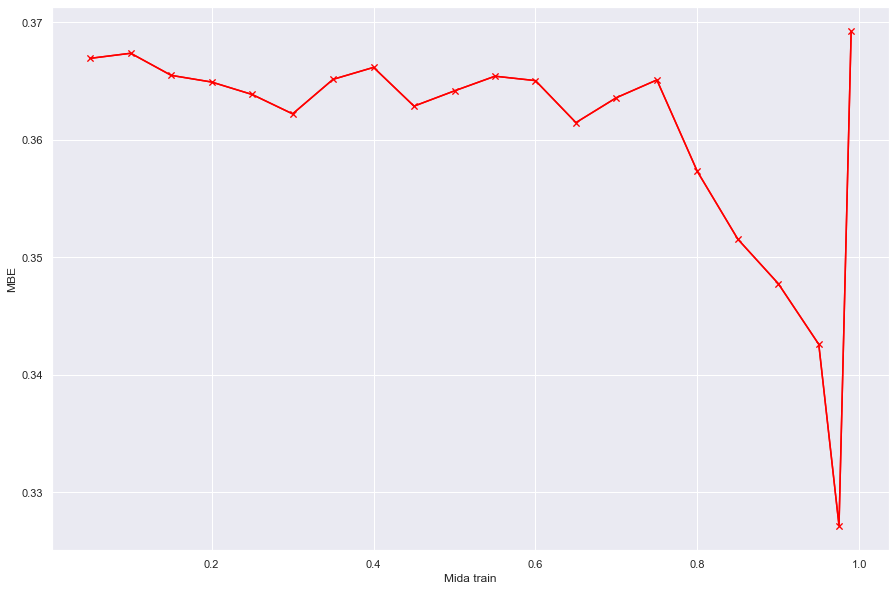

In [30]:
percentatges_train = []
percentatges_test = [0.01,0.025,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95]
llista_train = []
for i in percentatges_test:
    mbe = perform_bias(dataset_normalitzat, quality_raw, i, 1000000)
    llista_train.append(mbe)
    percentatges_train.append(1-i)


plt.figure(figsize=(15,10))
plt.plot(percentatges_train[::-1], llista_train[::-1], '-x', color="red")
plt.xlabel("Mida train")
plt.ylabel("MBE")
plt.show()

###Aquesta gràfica te el eix de les x al reves perque si ens fixem veurem que estem ficant per train size el test size que passem!!!!!1

#### Pregunta 3: I si utilitzem poques iteracions limitant el max_iter.
No puc dir gaire en aquest apartat perquè tot i canviar bastant el nombre d'iteracions i recalcular el MBE estimat no veig cap mena de diferència i aquest valor segueix sent el mateix independentment del nombre d'iteracions que fico, no sembla que el mean bias error es vegi afectat per aquest canvi en absolut. 

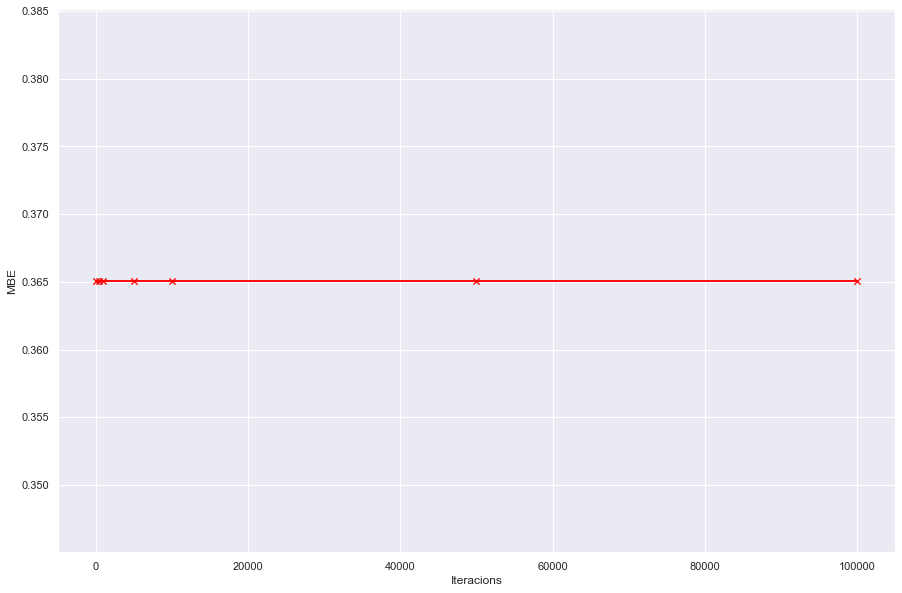

In [31]:
iteracions = [100, 500, 1000, 5000, 10000, 50000, 100000]
llista_train_iter = []
for i in iteracions:
    mbe = perform_bias(dataset_normalitzat, quality_raw, 0.25, i)
    llista_train_iter.append(mbe)


plt.figure(figsize=(15,10))
plt.plot(iteracions, llista_train_iter, '-x', color="red")
plt.xlabel("Iteracions")
plt.ylabel("MBE")
plt.show()

## D. Demostració Error de Variance (20%)

* Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (es a dir, model massa complexe)

* Crea models de features més complexes amb [sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

* Podem reduir el error de variança si enlloc de classificar el vi blanc i el negre, els separessim?

* Sabrieu explicar-me aquesta [gráfica](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)? Podeu generar-la amb aquestes dades de entrenament?



#### Pregunta 1: Què hem de fer per veure que el model que estem provant té un error de variança molt alt? (és a dir, es massa complexe).
Podriem per exemple calcular el MSE i sabem que aquest MSE és equivalent a la suma de la variància (VAR) i del quadrat del MBE que hem calculat abans. Aleshores el que farem serà calcular el MSE i amb la fòrmula següent calcularem VAR: 
                                    MSE = (MBE)**2 + VAR + error_implicit 
                                    
Ara suposant que l'error implicit sigui 0 (cosa que mai passarà) podrem estimar la variança teòrica màxima del model que seria doncs VAR = MSE - MBE**2
Aquesta serà la variança teòrica màxima perque molt probablement el error implicit del model mai sigui 0, serà un valor major que 0, aleshores la variança teòrica màxima serà quan aquest model no tingui error implícit, almenys ens dona una aproximació de la variança que podria arribar a tenir aquest model. 


També podem fer proves per veure si tenim un error molt alt al test mentre que tenim un error baix al training que ens dirà que tenim una variància elevada i el nostre model no haurà generalitzat bé el conjunt de dades. Veiem fins i tot que l'error sobre el test és bastant baix, més baix que el propi error del training però tots dos són molt propers aleshores això em fa pensar que efectivament tenim una variança petita. 

In [32]:
mbe_train, mse_train = perform_bias(dataset_normalitzat, quality_raw, 0.2, 1000000, "dos")
variança = mse_train - (mbe_train**2)
print("Tenim una variança teòrica màxima de: "+str(round(variança,5)))


Tenim una variança teòrica màxima de: 0.22964


In [33]:

x_train, x_test, y_train, y_test = train_test_split(dataset_normalitzat, quality_raw, test_size = 0.2, random_state=0)
clf = SGDClassifier(loss="log", alpha=0.1, eta0=0.01, max_iter=1000000)
clf.fit(x_train, y_train)
prediccions_train_var = clf.predict(x_train)
prediccions_test_var = clf.predict(x_test)
error_test = calcula_MSE(y_test, prediccions_test_var)
error_train = calcula_MSE(y_train, prediccions_train_var)
print("El error del test: "+str(round(error_test, 5))+"\nEl error del train: "+str(round(error_train,5)))

El error del test: 0.35731
El error del train: 0.36944


#### Pregunta 2: Crea models de features més complexes amb sklearn.preprocessing.PolynomialFeatures 
Suposo que ens demana fer servir aquesta funció de sklearn.preprocessing de PolynomialFeatures però tampoc se ben bé que és el que demana l'exercici perquè no ens diu explícitament que fer amb això... Suposo que l'objectiu era cercar informació sobre aquesta funció i intentar fer-la servir i potser mirar material que hi ha per youtube per exemple per veure com poder crear models complexes i fer servir una mica el codi de referència de la documentació de sklearn...

In [19]:
from sklearn.preprocessing import PolynomialFeatures 
L = []
for i in dataset_normalitzat:
    L.append(list(dataset_normalitzat[i]))
polinomi = PolynomialFeatures(interaction_only=True)
polinomi.fit_transform(L)

array([[1.        , 0.26446281, 0.20661157, ..., 0.03585821, 0.03756574,
        0.03155522],
       [1.        , 0.12666667, 0.14666667, ..., 0.10797778, 0.04395556,
        0.05775556],
       [1.        , 0.21686747, 0.20481928, ..., 0.0056612 , 0.02217303,
        0.02046741],
       ...,
       [1.        , 0.12921348, 0.15168539, ..., 0.08196566, 0.07360182,
        0.06804696],
       [1.        , 0.11594203, 0.2173913 , ..., 0.13862634, 0.18903592,
        0.13862634],
       [1.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

#### Pregunta 3: Podem reduïr l'error de la variància si enlloc de classificar el vi blanc i el negre els separessim?
Separem ens dos datasets diferents el vi blanc i el vi negre i calculem la variança i veiem que realment tampoc canvia gaire, el vi blanc sembla tenir un valor de variança més petit que el negre i que tots dos junts sent la variança més gran la del vi negre per separat i la que ens surt del dataset on tenim tots dos vins seria aproximadament la mitjana dels datasets separats. No veig una diferència significant al separar els vins. 
Comprovant també la diferència entre test i train per tots dos veig que pel vi blanc tenim un error més alt que al negre tant pel que fa al test com pel training però tampoc ens diu gaire això perquè els errors del test i training per cadascún dels dos cassos es bastant proper entre ells aleshores en principi la variància hauria de ser petita per tots dos...

In [37]:
vins = dataset.groupby(dataset_normalitzat.is_red_wine)
white_wine = vins.get_group(0)
quality_raw_white = pd.DataFrame(white_wine["quality_categorical"])
normalitza_dades(white_wine)
normalitza_dades(quality_raw_white)
white_wine = white_wine.drop(["quality_categorical", "quality", "type"], axis=1)
black_wine = vins.get_group(1)
quality_raw_black = pd.DataFrame(black_wine["quality_categorical"])
normalitza_dades(black_wine)
normalitza_dades(quality_raw_black)
black_wine = black_wine.drop(["quality_categorical", "quality", "type"], axis=1)
for i,j in zip([white_wine, black_wine], [quality_raw_white, quality_raw_black]):
    mbe_train, mse_train = perform_bias(i, j, 0.2, 1000000, "dos")
    variança = mse_train - (mbe_train**2)
    print("Tenim una variança teòrica màxima de: "+str(round(variança,5)))
    
    x_train_v, x_test_v, y_train_v, y_test_v = train_test_split(i, j, test_size = 0.2, random_state=0)
    clf_v = SGDClassifier(loss="log", alpha=0.1, eta0=0.01, max_iter=1000000)
    clf_v.fit(x_train_v, y_train_v)
    prediccions_train_var_v = clf.predict(x_train_v)
    prediccions_test_var_v = clf.predict(x_test_v)
    error_test = calcula_MSE(y_test_v, prediccions_test_var_v)
    error_train = calcula_MSE(y_train_v, prediccions_train_var_v)
    print("El error del test: "+str(round(error_test, 5))+"\nEl error del train: "+str(round(error_train,5)))
    print("\n------------------------------\n")


Tenim una variança teòrica màxima de: 0.21698
El error del test: 0.58624
El error del train: 0.5788

------------------------------

Tenim una variança teòrica màxima de: 0.23691
El error del test: 0.38871
El error del train: 0.37991

------------------------------



C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

#### Pregunta 4: Sabrieu explicar la gràfica que s'adjunta? La podriem crear amb les dades que tenim?
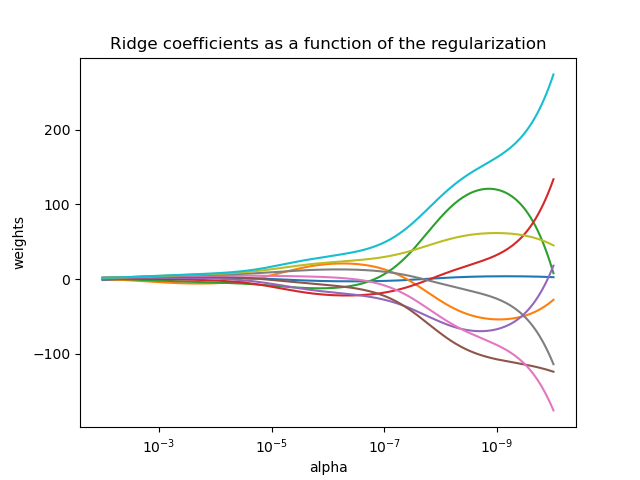

Aquí el que podem veure són els diferents coeficients dels nostres atributs del model, la gràfica concretament ens mostra el paràmetre que regula la regularització a mesura que fem gran el alpha o petita (tendeixi cap a 1 o 0 respectivament) i l'impacte que té sobre els coeficients del model. Fem servir normalment regularitzadors per treure so als nostres models quan tenim coeficients que al incrementar o decrementar poden arribar a tenir un impacte gran sobre les nostres prediccions, aleshores fem servir regularitzadors (Lasso o Ridge i fins i tot els dos) per suavitzar d'alguna manera aquest problema. 
Un paràmetre que ens regula aquest efecte és el alpha del que hem parlat també i com podem veure en aquesta gràfica el que passa quan fem el alpha més i més proper a 1 és que els coeficients tendeixen cap al 0, osigui cada cop es fan més i més petits mentre que si fem el alpha més i més petita el que passarà serà que aquests coeficients començaràn a creixer tant positiva com negativament fins que arribem un punt en el que el valor de alpha sigui tan petit que cada cop s'aproximarà més cap al MSE i aleshores això ens portarà a la casuïstica de tenir variacions bastant anomales respecte als nostres coeficients del model arribant a creixer i decreixer o fins i tot creixer de forma exponencial i descontrolada. El valor de alpha doncs ens hem d'assegurar de mantenir-lo en equilibri perque no ens passi això. 

Aquest efecte de fet l'hem vist al apartat B on hem provat a aplicar pels cassos de Lasso i Ridge uns valors per alpha de 0.0000001 per exemple (1e-7) i veiem que els coeficients arriben a tenir valors com -25, d'altres a 44, etc i si feiem més i més petita el alpha podiem veure que algún coeficient d'algun atribut concret passava de -27 a 31 per exemple.
Tot seguit el que he fet és copy-paste del codi que tenia a sobre a l'apartat B però aquest l'he modificat perque només faci servir Ridge ja que és el regularitzador que s'estudia en aquesta gràfica i passarem valors de alpha molt petits apropant-nos cada cop a valors més propers a 1 per veure com disminueixen els coeficients. 

In [38]:
diccionari_resultats_ridge = {}
diccionari_resultats_ridge["penalty"] = []
diccionari_resultats_ridge["alpha"] = []
diccionari_resultats_ridge["intercepte"] = []
for _,j in zip(X_train_n, [i for i in range(len(X_train_n.columns))]):
    diccionari_resultats_ridge["t"+str(j+1)] = []


llista_coeficients = []
alphas = [1e-15, 1e-13, 1e-10, 1e-7, 1e-5, 0.0001, 0.001, 0.01, 0.1]
for j in alphas: 
    reg_logistica_alpha_ridge = SGDClassifier(loss='log', penalty="l2",alpha=j, eta0=0.01, max_iter=1000000)
    reg_logistica_alpha_ridge.fit(X_train_n, y_train_n)
    diccionari_resultats_ridge["penalty"].append("l2")
    diccionari_resultats_ridge["alpha"].append(str(j))
    diccionari_resultats_ridge["intercepte"].append(reg_logistica_alpha.intercept_[0])
    step=0
    coeficients = np.array(reg_logistica_alpha_ridge.coef_).reshape(12,)
    llista_coeficients.append(coeficients)
    for coef in reg_logistica_alpha_ridge.coef_:
        for i,j in zip(X_train_n, coef):
            teta = "t"+str(step+1)
            diccionari_resultats_ridge[teta].append(j)
            step+=1 
                
taula_resultats_alpha_ridge = pd.DataFrame.from_dict(diccionari_resultats_ridge)
taula_resultats_alpha_ridge           


,penalty,alpha,intercepte,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12
0,l2,1e-15,0.488,2746.013,-27528.112,2097.256,24245.349,-7165.477,18661.641,-7047.632,-12841.796,-2370.059,8091.026,13699.031,-4311.472
1,l2,1e-13,0.488,-605.073,-7613.648,2167.449,10130.006,-1909.038,6215.575,-1019.136,-6791.084,-429.469,4669.437,8448.141,509.971
2,l2,1e-10,0.488,391.256,-1635.123,-397.605,1291.432,-106.803,1545.525,-467.921,-978.783,188.573,673.053,1119.414,-115.063
3,l2,1e-07,0.488,16.739,-60.945,-0.318,68.997,-8.988,30.199,-33.020,-44.823,-18.338,37.084,43.635,18.604
4,l2,1e-05,0.488,1.231,-7.410,-1.039,7.348,-1.583,5.153,-3.141,-4.569,0.562,3.669,6.420,0.461
5,l2,0.0001,0.488,0.336,-6.423,-0.741,4.292,-1.397,3.843,-2.753,-0.714,0.442,3.094,6.273,0.659
6,l2,0.001,0.488,0.055,-3.697,0.154,1.443,-0.872,1.235,-1.267,-0.273,0.249,1.517,4.729,-0.116
7,l2,0.01,0.488,-0.020,-0.890,0.170,0.031,-0.272,0.107,-0.413,-0.315,0.120,0.286,1.892,-0.399
8,l2,0.1,0.488,-0.016,-0.124,0.030,-0.008,-0.045,0.013,-0.040,-0.062,0.020,0.024,0.311,-0.168


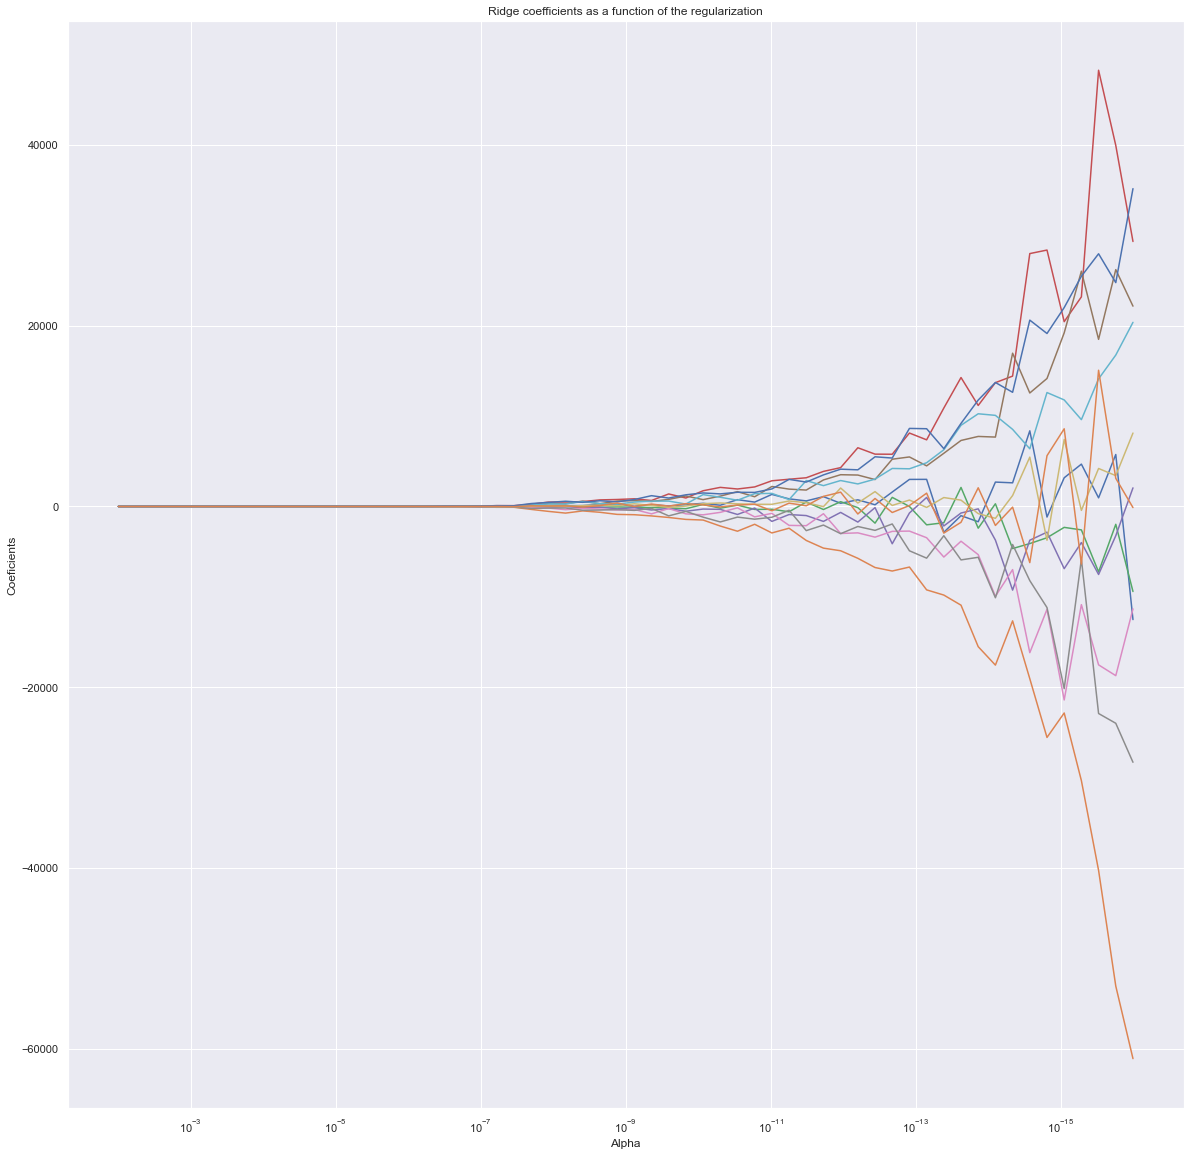

In [39]:
alphas_generades = np.logspace(-16, -2, 60)
llista_alphas = []
llista_coeficients_g = []
for j in alphas_generades: 
    llista_alphas.append(j)
    reg_logistica_alpha_ridge = SGDClassifier(loss='log', penalty="l2",alpha=j, eta0=0.01, max_iter=1000000)
    reg_logistica_alpha_ridge.fit(X_train_n, y_train_n)
    step=0
    coeficients = np.array(reg_logistica_alpha_ridge.coef_).reshape(12,)
    llista_coeficients_g.append(coeficients)

plt.figure(figsize=(20,20))
ax = plt.gca()
ax.plot(llista_alphas, llista_coeficients_g)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('Alpha')
plt.ylabel('Coeficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Si ens fixem amb el petit dataframe que he creat dels resultats dels coeficients fent servir diferents alpha's i mirem T12 veurem un canvi bastant anomal si comparem els diferents valors que hi veiem a les tres primeres files per alpha=(1e-15, 1e-13 i 1e-10) veurem que per 1e-10 aquest coeficient arriba a tenir un valor de -282.5, reduïnt més el alpha fins al 1e-13 augmenta repentinament fins arribar a un valor de 2521.6 i al tornar a reduïr el alpha fins a un 1e-15 cau en picat fins al -2125.2, aquí podem veure una de les fluctuacions estranyes que hi veiem al gràfic d'exemple de coeficients que pujen i baixen de cop i volta. T5 per exemple fins on hem arribat reduïnt el alpha baixa constantment mentre que T1 fa tot el contrari, té una tendència ascendent aparentment sostinguda. Comentar també que a cada cop que ens apropem al valor de alpha de la darrera fila (més i més a prop de 1) els coeficients tendeixen cap al 0 com podem veure.

## E. Extra. Multi class i avaluació (20%)

* Considerant que cada qualitat és una classe, avalua el sisteman usant una aproximació multi-classe. Prova les millors solucions trobades en els punts antriors i compara-les usant ROC curves.

* Considera la qualitat com un valor continuo i compara el punt anterior amb una aproximació basada en regresssió.